# Diabetes Data Analysis

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [6]:
data = pd.read_csv("diabetes.csv")
df = data.copy()

In [7]:
def check_df(dataframe: object, head: object = 5) -> object:
    print("Shape")
    print(dataframe.shape)
    print("Types")
    print(dataframe.dtypes)
    print("NANs")
    print(dataframe.isnull().sum())
    print("Quantiles")
    print(dataframe.quantile([0, 0.05,0.1, 0.25, 0.50,0.75, 0.90, 0.95, 0.99, 1]).T)
check_df(df)

Shape
(768, 9)
Types
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
NANs
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Quantiles
                          0.000  0.050  0.100  0.250   0.500   0.750   0.900   0.950   0.990   1.000
Pregnancies               0.000  0.000  0.000  1.000   3.000   6.000   9.000  10.000  13.000  17.000
Glucose                   0.000 79.000 85.000 99.000 117.000 140.250 167.000 181.000 196.000 199.000
BloodPressure             0.000 38.700 5

In [8]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df)
df2 = pd.DataFrame(normal, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [27]:
x = pd.DataFrame(df2, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df2.Outcome.values.reshape(-1,1)

In [28]:
# create train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [29]:
# create model
logreg = LogisticRegression(solver='liblinear')

In [34]:
kf = KFold(10)
result_validation = cross_val_score(logreg, x_train, y_train, cv=kf)

c:\Users\raden\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raden\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raden\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\raden\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [35]:
result_validation

array([0.75806452, 0.64516129, 0.80645161, 0.80645161, 0.73770492,
       0.81967213, 0.7704918 , 0.68852459, 0.7704918 , 0.78688525])

In [36]:
print(np.mean(result_validation))

0.7589899524061343


In [37]:
# fit model on dataset train
logreg.fit(x_train, y_train.ravel())


LogisticRegression(solver='liblinear')

In [38]:
# prediction
y_pred = logreg.predict(x_test)
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [39]:
# compare peredict and actual
compare =pd.DataFrame({'actual': y_test.flatten(),
          'predict' : y_pred.flatten()})
compare

,actual,predict
0,1.000,1.000
1,0.000,0.000
2,0.000,0.000
3,1.000,1.000
4,0.000,0.000
...,...,...
149,1.000,0.000
150,0.000,0.000
151,1.000,0.000
152,0.000,0.000


In [40]:
from sklearn import metrics
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8051948051948052


In [10]:
df.groupby(['Outcome']).agg({"Age":["mean", "median"],
                            "Glucose":["mean","median"],
                            "Insulin":["mean", "median"],
                            "DiabetesPedigreeFunction":["mean", "median"],
                            "Pregnancies":["mean", "median"],
                            "BMI":["mean", "median"],
                            "SkinThickness":["mean", "median"],
                            "BloodPressure":["mean", "median"]}) 

Age        Glucose         Insulin        DiabetesPedigreeFunction        Pregnancies           BMI        SkinThickness        BloodPressure       
          mean median    mean  median    mean median                     mean median        mean median   mean median          mean median          mean median
Outcome                                                                                                                                                        
0       31.190 27.000 109.980 107.000  68.792 39.000                    0.430  0.336       3.298  2.000 30.304 30.050        19.664 21.000        68.184 70.000
1       37.067 36.000 141.257 140.000 100.336  0.000                    0.550  0.449       4.866  4.000 35.143 34.250        22.164 27.000        70.825 74.000

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


C:\Users\raden\AppData\Local\Temp\ipykernel_7956\2868779516.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)


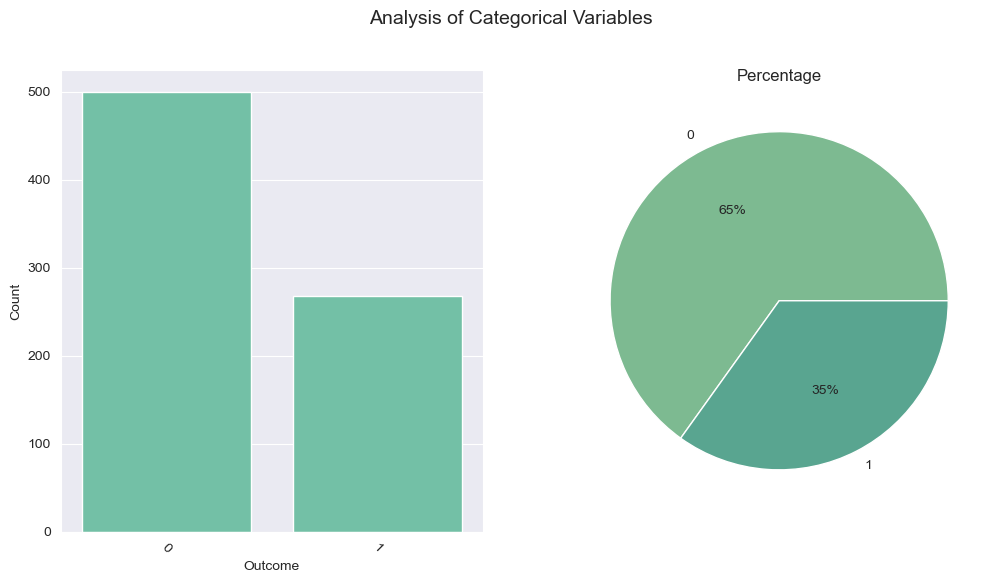

In [12]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    if plot:
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(x=dataframe[col_name], color="mediumaquamarine", ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count')
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)
        ax[0, 1] = plt.pie(dataframe[col_name].value_counts().values, labels=dataframe[col_name].value_counts().keys(),
                           colors=sns.color_palette('crest'), autopct='%.0f%%')
        plt.title("Percentage")
        fig.set_size_inches(12, 6)
        fig.suptitle('Analysis of Categorical Variables', fontsize=14)
        plt.show()
for col in cat_cols:
    cat_summary(df, col, plot=True)

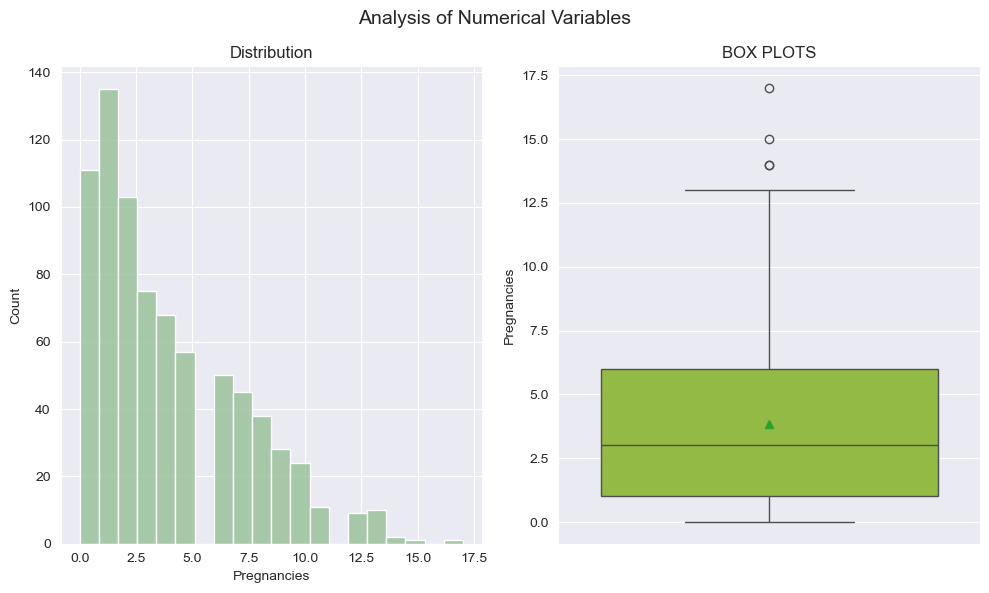

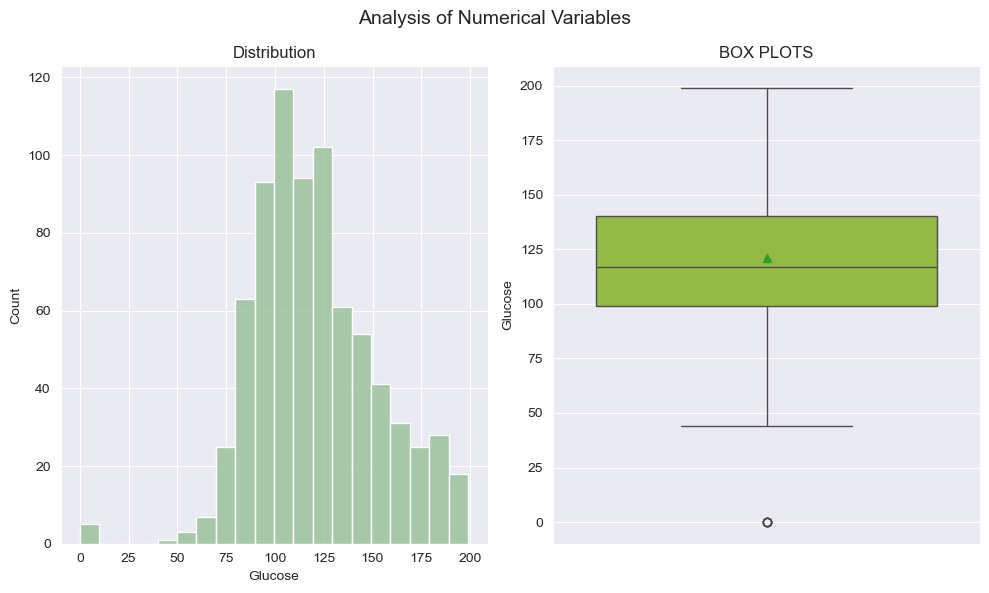

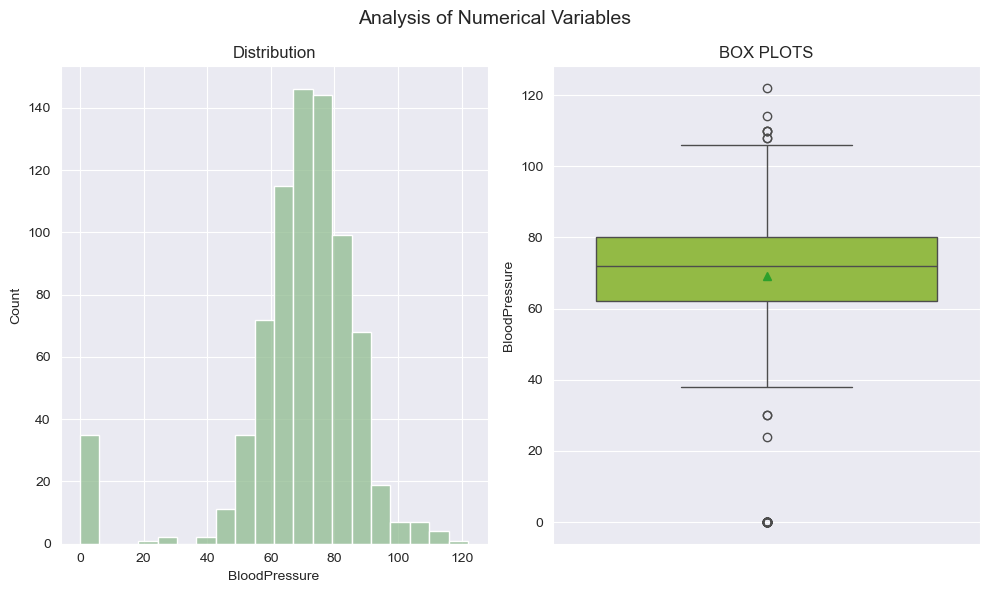

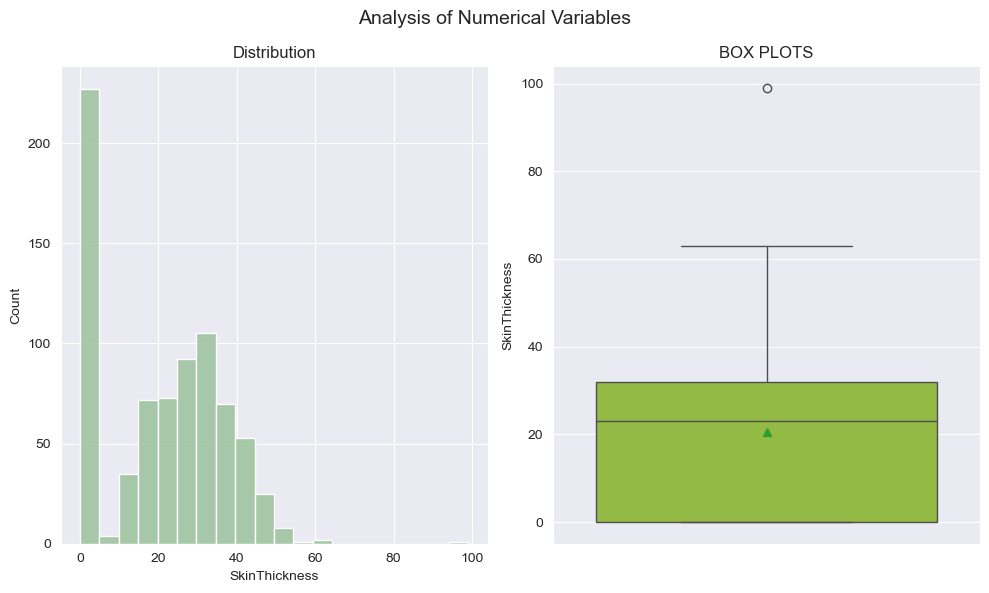

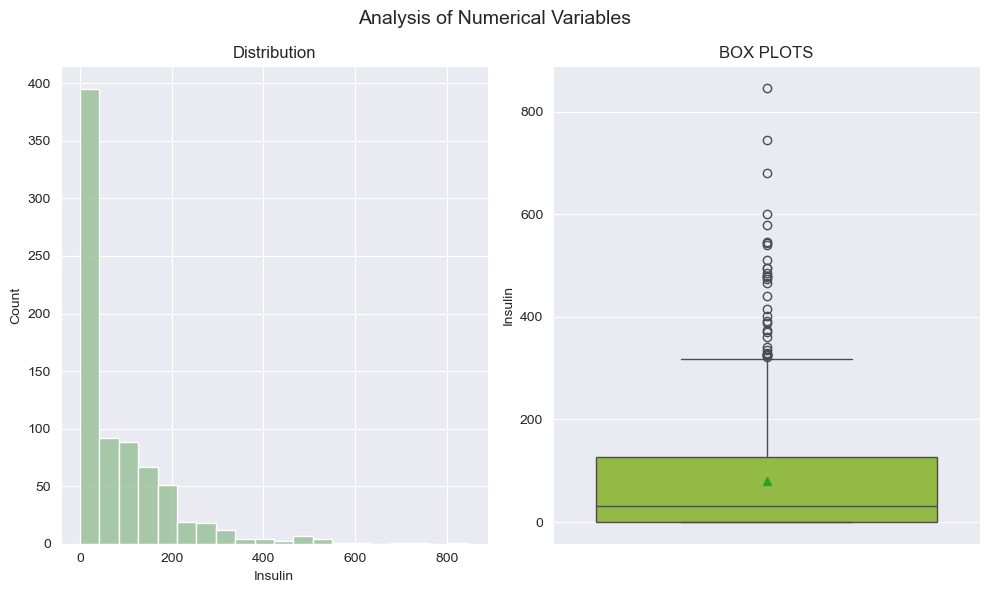

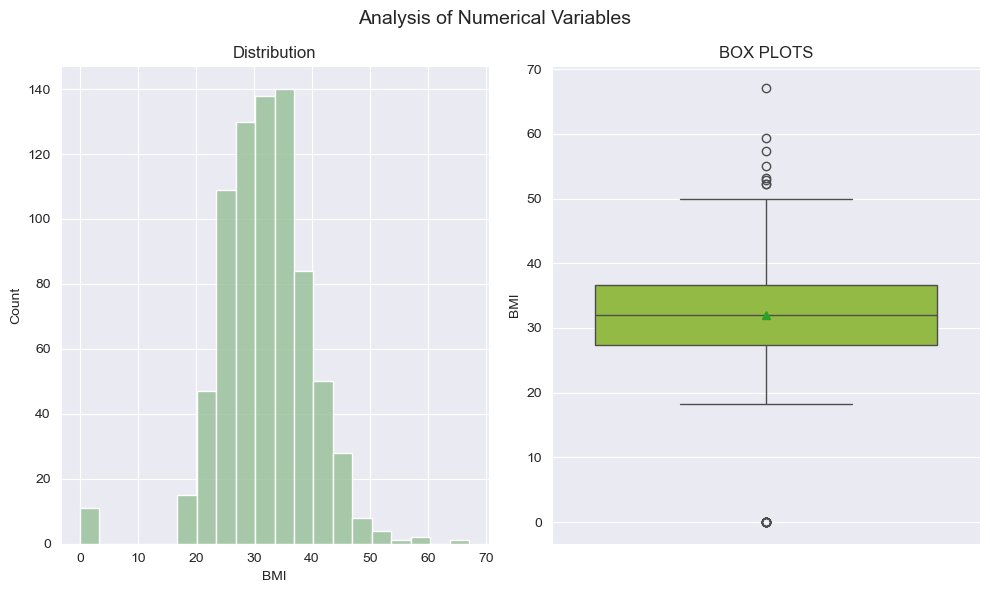

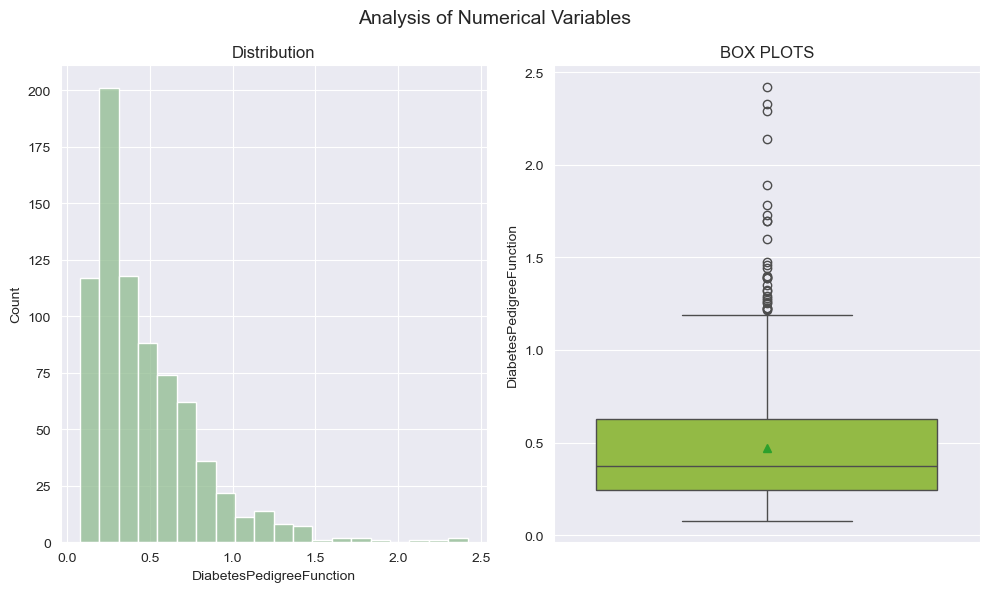

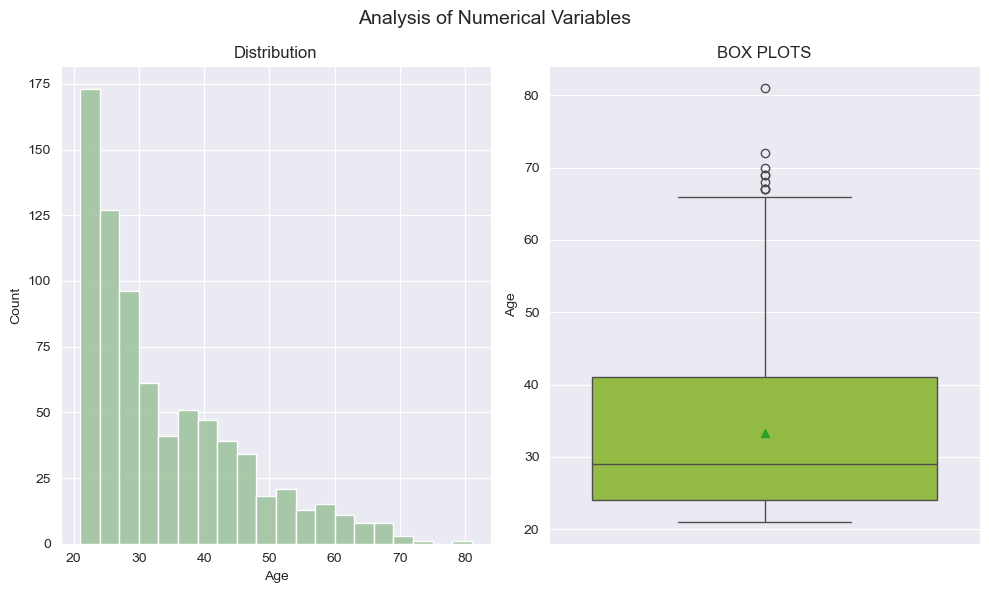

In [16]:
# Suppress warnings to avoid clutter
warnings.filterwarnings("ignore", category=FutureWarning)
def num_summary(dataframe, numerical_col):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))  # Specify figsize for consistent visuals
    # Histogram
    sns.histplot(x=dataframe[numerical_col], color="darkseagreen", bins=20, ax=ax[0])
    ax[0].set_ylabel('Count')
    ax[0].set_title('Distribution')
    # Box plot
    sns.boxplot(y=dataframe[numerical_col], color="yellowgreen", showmeans=True, ax=ax[1])  # Add mean indicator
    ax[1].set_title('BOX PLOTS')
    fig.suptitle('Analysis of Numerical Variables', fontsize=14)
    plt.tight_layout()  # Adjust spacing for better readability
    plt.show()
for col in df[num_cols]:
    num_summary(df, col)

In [18]:
dff=df.copy()

             New_Age_Cat  Ratio
New_Age_Cat                    
Young                396 51.562
Mature               291 37.891
Senior                81 10.547


C:\Users\raden\AppData\Local\Temp\ipykernel_7956\2868779516.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)


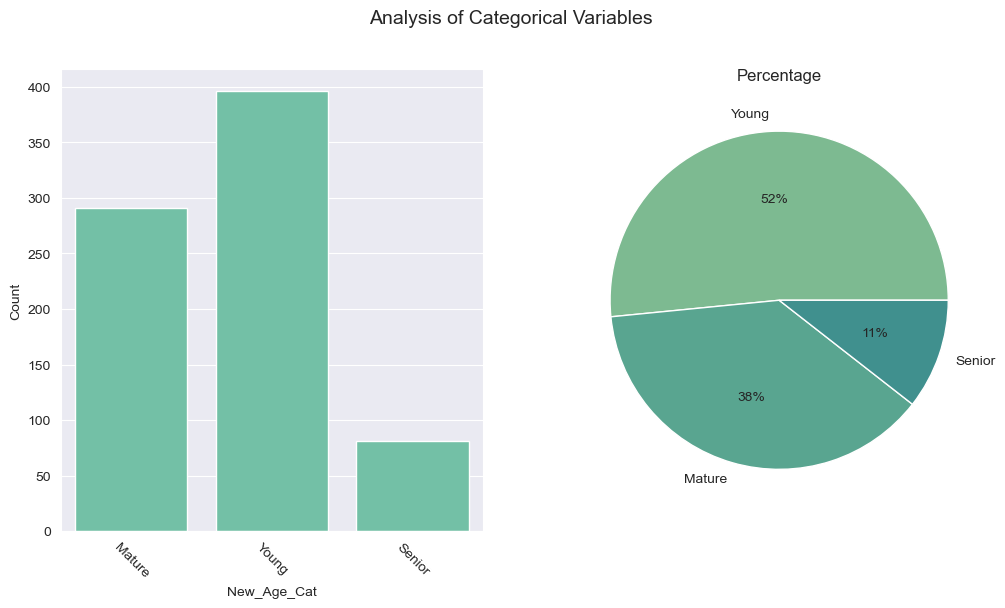

In [19]:
dff["New_Age_Cat"] = dff["Age"].apply(lambda x: "Young" if x < 30 else ("Mature" if 30 <= x <= 50 else "Senior"))
cat_summary(dff,"New_Age_Cat", plot=True)

             GlucoseCat  Ratio
GlucoseCat                    
Normal              571 74.349
Prediabetes         197 25.651


C:\Users\raden\AppData\Local\Temp\ipykernel_7956\2868779516.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)


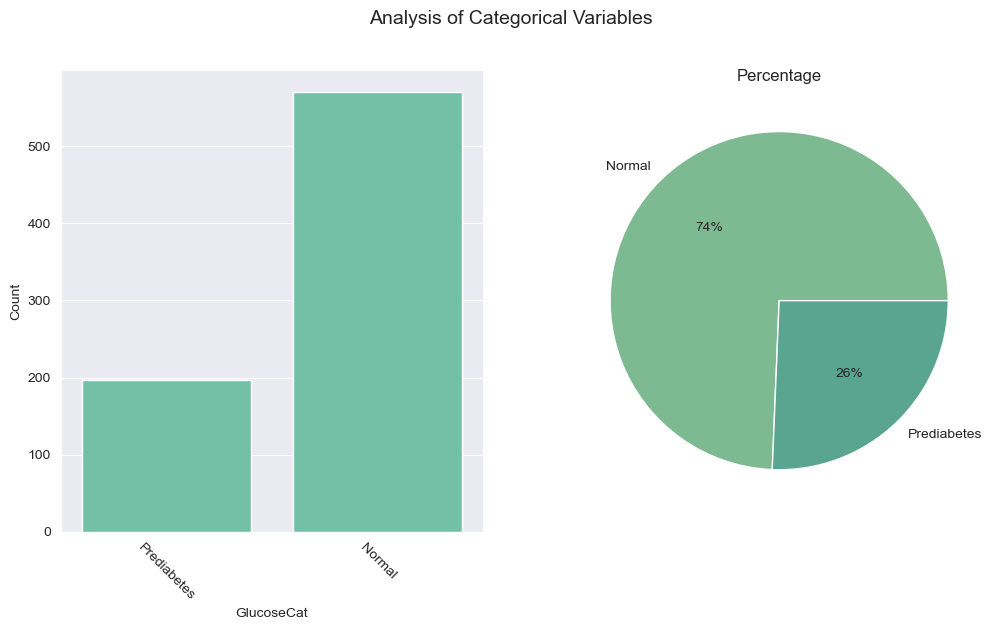

In [20]:
dff["GlucoseCat"] = dff["Glucose"].apply(lambda x: "Normal" if x < 140 else ("Prediabetes" if 140 <= x <= 200 else "diabetes"))
cat_summary(dff,"GlucoseCat", plot=True)